In [1]:
import pandas as pd
df= pd.read_csv("NEW_Keywords_loan.csv")
df

,index,selftext,num_comments,score,title,type
0,23,Are payday type loans all I can do?,0,1,"Loans and credit cards, what to expect?",Adult
1,57,Cars are often upside down in their loans. Hom...,4,2,Buying Insurance (car and home/renters),Adult
2,112,"I'm 27F and never had a credit card, but now I...",4,9,Credit???,Adult
3,122,I figured out that to have a 3 month cushion I...,0,1,Savings,Adult
4,123,"He has since set boundaries on what, how much,...",0,1,Can you spot me? (LOANS!),Adult
...,...,...,...,...,...,...
5224,4169,"Do you wish to fucking go back to high school,...",24,1,Do you wish to go back to high shcool?,Adult
5225,4377,"I do have student loans, but they’re not nearl...",12,23,"I’m scared, not able to afford psychiatric med...",Adult
5226,4568,I am wondering what to do for the 19 year old....,32,1,Mom would appreciate your thoughts,Adult
5227,4746,We’ve been living off of my student loans.,0,1,"Hi, I’m a 19 year old girl who’s found herself...",Adult


In [2]:
import re
def remove_other(x):
    x = re.sub("\$"," ", x) #remove $
    x = re.sub("https*\S+", " ", x) #remove url
    #x = re.sub("\'\w+", '', x) #remove i'm,we're,let's after the '
    #x = re.sub("[0-9]+", '', x) #remove numbers
    x = x.encode('ascii', 'ignore').decode()
    return x

In [3]:
from nltk.stem import WordNetLemmatizer
def lemmatize(words):
    lemmatizer = WordNetLemmatizer()
    nwords=[]
    for word in words:
        word=lemmatizer.lemmatize(word)
        nwords.append(word)
    return ' '.join(nwords)

In [4]:
df['selftext']=df['selftext'].apply(lambda x: remove_other(x))
df['selftext']= df['selftext'].str.split().apply(lambda x: lemmatize(x))
df['selftext']

0                      Are payday type loan all I can do?
1       Cars are often upside down in their loans. Hom...
2       I'm 27F and never had a credit card, but now I...
3       I figured out that to have a 3 month cushion I...
4       He ha since set boundary on what, how much, an...
                              ...                        
5224    Do you wish to fucking go back to high school,...
5225    I do have student loans, but theyre not nearly...
5226    I am wondering what to do for the 19 year old....
5227            Weve been living off of my student loans.
5228    So I'm gonna take out another loan which hey ,...
Name: selftext, Length: 5229, dtype: object

In [5]:
X=pd.DataFrame({'text':df['selftext']})
X = X.dropna().reset_index()
X

,index,text
0,0,Are payday type loan all I can do?
1,1,Cars are often upside down in their loans. Hom...
2,2,"I'm 27F and never had a credit card, but now I..."
3,3,I figured out that to have a 3 month cushion I...
4,4,"He ha since set boundary on what, how much, an..."
...,...,...
5224,5224,"Do you wish to fucking go back to high school,..."
5225,5225,"I do have student loans, but theyre not nearly..."
5226,5226,I am wondering what to do for the 19 year old....
5227,5227,Weve been living off of my student loans.


In [6]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#analyzer=‘char_wb’
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(X['text'])
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

,000,000 loan,000 student,10,10 000,10 year,100,1000,100k,10k,...,worried,worth,x200b,year,year ago,year loan,year old,years,yr,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.108889,0.0,0.0,0.223407,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
5225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
5226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.359984,0.0,0.0,0.369291,0.0,0.0,0.0
5227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [7]:
from sklearn.decomposition import NMF

model1=NMF(n_components=3,init="random",random_state=0)
model1.fit(count_df1)
#model1.components_

NMF(init='random', n_components=3, random_state=0)

In [8]:
import numpy as np
def top_words(X, model, component, num_words):
    """
    Extract the top words from the specified component 
    for a topic model trained on data. 
    X: a term-document matrix, assumed to be a pd.DataFrame
    model: a sklearn model with a components_ attribute, e.g. NMF
    component: the desired component, specified as an integer. 
        Must be less than than the total number of components in model
    num_words: the number of words to return.
    """
    orders = np.argsort(model.components_, axis = 1)
    important_words = np.array(X.columns)[orders]
    return important_words[component][-num_words:]

In [9]:
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10),
                   'Topic 2':top_words(count_df1, model1, 2, 10),})
topic1

,Topic 0,Topic 1,Topic 2
0,personal,home,pay student
1,loan credit,month,paying
2,car,car loan,pay
3,card debt,rate,loan
4,credit score,wa,loan debt
5,score,payment,student loans
6,debt,year,debt
7,credit card,pay,loans
8,card,car,student loan
9,credit,loan,student


In [10]:
W=model1.fit_transform(count_df1)
L=[]
for i in W:
    L.append(i.argmax())
X['topic']=L
t0=X[X.topic==0]
t1=X[X.topic==1]
t2=X[X.topic==2]
t1

,index,text,topic
0,0,Are payday type loan all I can do?,1
1,1,Cars are often upside down in their loans. Hom...,1
8,8,So i want to refinance my car loan because my ...,1
9,9,I want to pay off my car loan but am not sure ...,1
10,10,Have a car longer than your loan or lease lasts5.,1
...,...,...,...
5207,5207,"So first off, since this is a fund with an old...",1
5208,5208,"So last week-ends, a friend of my ex-boyfriend...",1
5217,5217,I very desperately need a job because between ...,1
5218,5218,"old enough to drive, but not old enough to be ...",1


## Compare Emotion across topics

In [11]:
def sent_df(df):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
    import my_module
    import importlib
    importlib.reload(my_module)

    #create a list of dictionaries
    sia = SIA()
    results = []
    words=[]

    for line in df['text']:
        D,pol_score=my_module.polarity_scores(sia,text=line) #use customized module
        pol_score['text'] = line
        results.append(pol_score)
        words.append(D)
    #Extract sentiment words
    D_p=[] # positive word and its sentiment score
    D_n=[] # negative word and its sentiment score
    D1=[] # only positive word
    D2=[] # only negative word
    for i in range(len(words)):
        newDict = {key: value for (key, value) in words[i].items() if value != 0.0 }
        newDict1 = {key: value for (key, value) in words[i].items() if value > 0.0 }
        newDict2 = {key: value for (key, value) in words[i].items() if value < 0.0 }
        D_p.append(newDict1)
        D_n.append(newDict2)
        D1.append(list(newDict1.keys()))
        D2.append(list(newDict2.keys()))
    #create a df to write in the results of sentiment analysis
    sent = pd.DataFrame(results)
    sent['p_word_dict']=D_p
    sent['n_word_dict']=D_n
    p=[]
    n=[]
    for i in D1:
        p.append(' '.join(i))
    for i in D2:
        n.append(' '.join(i))
    sent['total']=(sent.pos-sent.neg)/sent.neu    
    sent['p_word']=p
    sent['n_word']=n
    sent['label']=0
    sent['label'].loc[sent['total']> 0]=1
    sent['label'].loc[sent['total']< 0]=-1
    return sent

In [12]:
a=sent_df(t0)

a['topic']=0

b=sent_df(t1)
b['topic']=1

c=sent_df(t2)
c['topic']=2
a

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

,neg,neu,pos,compound,text,p_word_dict,n_word_dict,total,p_word,n_word,label,topic
0,0.226,0.720,0.054,-0.9090,"I'm 27F and never had a credit card, but now I...",{'shit': 2.886},"{'credit': -1.7759999999999998, 'bad': -3.75, ...",-0.238889,shit,credit bad great,-1,0
1,0.039,0.780,0.181,0.9886,"He ha since set boundary on what, how much, an...","{'ha': 1.4, 'strong': 2.3, 'secured': 1.7, 'cr...","{'lower': -1.4783499999999998, 'charged': -0.8...",0.182051,ha strong secured credit interest greater flex...,lower charged pay bad,1,0
2,0.000,0.645,0.355,0.6705,Are there other method to getting good credit ...,"{'good': 1.9, 'credit': 1.6}",{},0.550388,good credit,,1,0
3,0.186,0.565,0.249,0.2263,"Please note that Ill be 22 when I move, and th...","{'Please': 1.3, 'credit': 1.6}",{'Ill': -1.8},0.111504,Please credit,Ill,1,0
4,0.169,0.692,0.138,-0.1901,I just passed my driver's test three day ago (...,{'credit': 2.4000000000000004},{'terrible': -3.1500000000000004},-0.044798,credit,terrible,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
789,0.000,0.909,0.091,0.3818,Im leaning toward not having her be a co-appli...,{'credit': 1.6},{},0.100110,credit,,1,0
790,0.159,0.610,0.232,0.4215,Expense wise I pay 500/ month on rentI have ab...,"{'wise': 2.1, 'credit': 1.6}","{'pay': -0.4, 'debt': -1.5}",0.119672,wise credit,pay debt,1,0
791,0.204,0.748,0.047,-0.8218,So I'm sort of freaking out because all the lo...,{'credit': 1.6},"{'freaking': -2.093, 'rejected': -2.3, 'refuse...",-0.209893,credit,freaking rejected refuse loss,-1,0
792,0.100,0.740,0.161,0.2244,After a few year and a couple car loans(vehicl...,"{'accepted': 1.1, 'Credit': 1.6}",{'accident': -2.1},0.082432,accepted Credit,accident,1,0


In [13]:
final=pd.concat([a,b,c],axis=0)
final

,neg,neu,pos,compound,text,p_word_dict,n_word_dict,total,p_word,n_word,label,topic
0,0.226,0.720,0.054,-0.9090,"I'm 27F and never had a credit card, but now I...",{'shit': 2.886},"{'credit': -1.7759999999999998, 'bad': -3.75, ...",-0.238889,shit,credit bad great,-1,0
1,0.039,0.780,0.181,0.9886,"He ha since set boundary on what, how much, an...","{'ha': 1.4, 'strong': 2.3, 'secured': 1.7, 'cr...","{'lower': -1.4783499999999998, 'charged': -0.8...",0.182051,ha strong secured credit interest greater flex...,lower charged pay bad,1,0
2,0.000,0.645,0.355,0.6705,Are there other method to getting good credit ...,"{'good': 1.9, 'credit': 1.6}",{},0.550388,good credit,,1,0
3,0.186,0.565,0.249,0.2263,"Please note that Ill be 22 when I move, and th...","{'Please': 1.3, 'credit': 1.6}",{'Ill': -1.8},0.111504,Please credit,Ill,1,0
4,0.169,0.692,0.138,-0.1901,I just passed my driver's test three day ago (...,{'credit': 2.4000000000000004},{'terrible': -3.1500000000000004},-0.044798,credit,terrible,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1351,0.122,0.878,0.000,-0.3612,"Im already 20,000 in student loan debt after f...",{},{'debt': -1.5},-0.138952,,debt,-1,2
1352,0.063,0.860,0.077,0.1280,"Do you wish to fucking go back to high school,...",{'wish': 1.7},{'no': -1.2},0.016279,wish,no,1,2
1353,0.000,0.892,0.108,0.3919,"I do have student loans, but theyre not nearly...",{'well': 1.6500000000000001},{},0.121076,well,,1,2
1354,0.000,1.000,0.000,0.0000,Weve been living off of my student loans.,{},{},0.000000,,,0,2


In [14]:
final['text']=final['text'].str.lower()

def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df

import nltk
from nltk.corpus import stopwords
#nltk.download("stopwords") #uncomment it when run it for the first time
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

final['text']=final['text'].apply(lambda x: remove_stopwords(x))

def lemmatize(words):
    lemmatizer = WordNetLemmatizer()
    nwords=[]
    for word in words:
        word=lemmatizer.lemmatize(word)
        nwords.append(word)
    return ' '.join(nwords)

final['text']= final['text'].str.split().apply(lambda x: lemmatize(x))

In [15]:
def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df
count_words(final['text'])

NameError: name 'itertools' is not defined

In [20]:
import itertools
import collections

spec_chars = ["!",'“','"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    final['text'] = final['text'].str.replace(char, ' ')
    final['text'] = final['text'].str.split().str.join(" ")
    
stop_words.update({"i'm",'would','k','im','could','also',
                   'amp','much','one','like','get',
                   'since','need','etc','got','always',
                   'know','want','thing','really','dont',
                   'feel','find','even','go','would','well','wa','im'
                  })
final['text']=final['text'].apply(lambda x: remove_stopwords(x))

count_words(final['text'][final['topic']==0]).head(10)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  if __name__ == '__main__':


,words,count
0,credit,1352
1,loan,1328
2,card,653
3,debt,428
4,student,315
5,car,310
6,score,267
7,pay,257
8,loans,200
9,month,193


In [21]:
count_words(final['text'][final['topic']==1]).head(10)

,words,count
0,loan,6768
1,pay,1297
2,year,1234
3,car,1189
4,interest,1070
5,payment,1023
6,month,799
7,rate,727
8,2,648
9,000,633


In [22]:
count_words(final['text'][final['topic']==2]).head(10)

,words,count
0,loan,2076
1,student,1975
2,loans,803
3,debt,762
4,pay,549
5,interest,373
6,year,331
7,payment,328
8,paying,306
9,month,304


In [23]:
from nltk.util import ngrams
def count_2gram(text):
    all_words = list(itertools.chain(*text.str.split()))
    esBigrams = ngrams(all_words, 2)
    counts = collections.Counter(esBigrams)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])
    dictionary2 = [' '.join(tup) for tup in counts_df.words]
    counts_df.words=dictionary2

    return counts_df


In [24]:
count_2gram(final['text'][final['topic']==0]).head(10)


,words,count
0,credit card,545
1,student loan,215
2,credit score,213
3,card debt,150
4,personal loan,132
5,car loan,131
6,loan credit,102
7,credit union,81
8,student loans,77
9,auto loan,72


In [25]:
count_2gram(final['text'][final['topic']==1]).head(10)

,words,count
0,car loan,433
1,interest rate,392
2,student loan,387
3,auto loan,205
4,personal loan,204
5,pay loan,203
6,monthly payment,190
7,take loan,156
8,30 year,147
9,loan amount,140


In [26]:
count_2gram(final['text'][final['topic']==2]).head(10)

,words,count
0,student loan,1367
1,student loans,529
2,loan debt,276
3,pay student,127
4,paying student,104
5,interest rate,93
6,federal student,79
7,loan payment,66
8,000 student,65
9,car loan,63


[Text(0, 0.5, 'Sentiment Score'), Text(0.5, 1.0, 'Sentiment Score by topics')]

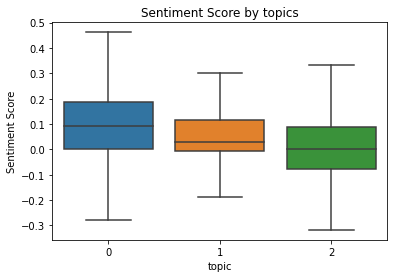

In [27]:
import seaborn as sns
ax = sns.boxplot(x="topic", y="total", data=final,showfliers = False)
ax.set(ylabel="Sentiment Score",title="Sentiment Score by topics")

## Most common positive/negative words

In [28]:
def sort_pn(df):
    positive=df.p_word[df['label']==1] #positive words in positive post
    negative=df.n_word[df['label']==-1] #negative words in negative post
    return positive,negative

In [29]:
import itertools
import collections
def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df

In [30]:
positive,negative=sort_pn(final)
p_n=pd.concat([count_words(positive)[:20],count_words(negative)[:20]])
p_n

,words,count
0,credit,937
1,interest,835
2,like,460
3,ha,397
4,want,275
5,good,239
6,help,222
7,better,218
8,save,185
9,best,173


In [31]:
positive,negative=sort_pn(a)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,credit,553
1,interest,91
2,like,70
3,ha,56
4,good,56
0,debt,119
1,pay,55
2,no,52
3,credit,27
4,sure,13


In [32]:
positive,negative=sort_pn(b)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,interest,567
1,like,298
2,credit,283
3,ha,249
4,want,195
0,pay,340
1,no,151
2,debt,131
3,lower,43
4,sure,41


In [33]:
positive,negative=sort_pn(c)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,interest,177
1,credit,101
2,like,92
3,ha,92
4,save,55
0,debt,304
1,pay,185
2,no,130
3,emergency,27
4,No,27


## Word Frequency splitted by sentiment

In [34]:
from nltk.util import ngrams
def count_2gram(text):
    all_words = list(itertools.chain(*text.str.split()))
    es2grams = ngrams(all_words, 2)
    counts = collections.Counter(es2grams)
    count_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])
    dictionary2 = [' '.join(tup) for tup in count_df.words]
    count_df.words=dictionary2

    return count_df

In [35]:
final

,neg,neu,pos,compound,text,p_word_dict,n_word_dict,total,p_word,n_word,label,topic
0,0.226,0.720,0.054,-0.9090,27f never credit card kinda build credit adult...,{'shit': 2.886},"{'credit': -1.7759999999999998, 'bad': -3.75, ...",-0.238889,shit,credit bad great,-1,0
1,0.039,0.780,0.181,0.9886,ha set boundary might loan money someone sched...,"{'ha': 1.4, 'strong': 2.3, 'secured': 1.7, 'cr...","{'lower': -1.4783499999999998, 'charged': -0.8...",0.182051,ha strong secured credit interest greater flex...,lower charged pay bad,1,0
2,0.000,0.645,0.355,0.6705,method getting good credit besides loan,"{'good': 1.9, 'credit': 1.6}",{},0.550388,good credit,,1,0
3,0.186,0.565,0.249,0.2263,please note ill 22 move credit ill paying stud...,"{'Please': 1.3, 'credit': 1.6}",{'Ill': -1.8},0.111504,Please credit,Ill,1,0
4,0.169,0.692,0.138,-0.1901,passed driver test three day ago yay due loans...,{'credit': 2.4000000000000004},{'terrible': -3.1500000000000004},-0.044798,credit,terrible,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1351,0.122,0.878,0.000,-0.3612,already 20 000 student loan debt finishing com...,{},{'debt': -1.5},-0.138952,,debt,-1,2
1352,0.063,0.860,0.077,0.1280,wish fucking back high school college loans fa...,{'wish': 1.7},{'no': -1.2},0.016279,wish,no,1,2
1353,0.000,0.892,0.108,0.3919,student loans theyre nearly enough parent make...,{'well': 1.6500000000000001},{},0.121076,well,,1,2
1354,0.000,1.000,0.000,0.0000,weve living student loans,{},{},0.000000,,,0,2


In [36]:
def pn_freq(df):
    count_p=count_2gram(df['text'][df['label']>0.121076]) #>0.109797 #==1
    count_n=count_2gram(df['text'][df['label']<-0.000268]) #<-0.001208 #==-1
    return count_p,count_n

p,n=pn_freq(final)
p.head(10),n.head(10)

(             words  count
 0     student loan   1183
 1    interest rate    486
 2      credit card    451
 3    student loans    392
 4         car loan    382
 5     credit score    253
 6    personal loan    234
 7        auto loan    193
 8  monthly payment    173
 9         pay loan    159,
            words  count
 0   student loan    655
 1  student loans    226
 2      loan debt    209
 3       car loan    180
 4    credit card    169
 5       pay loan     95
 6  personal loan     90
 7      card debt     86
 8      auto loan     77
 9       loan pay     72)

In [37]:
p,n=pn_freq(final[final.topic==0])
p.head(10),n.head(10)

(           words  count
 0    credit card    393
 1   credit score    165
 2   student loan    136
 3  personal loan    101
 4       car loan     94
 5    loan credit     85
 6   credit union     75
 7      card debt     72
 8      auto loan     61
 9  interest rate     52,
            words  count
 0    credit card    149
 1   student loan     76
 2      card debt     76
 3   credit score     47
 4       car loan     34
 5  student loans     29
 6  personal loan     29
 7      loan debt     24
 8    loan credit     17
 9   debt student     13)

In [38]:
p,n=pn_freq(final[final.topic==1])
p.head(10),n.head(10)

(             words  count
 0    interest rate    356
 1     student loan    285
 2         car loan    244
 3  monthly payment    142
 4    personal loan    131
 5         pay loan    124
 6        auto loan    122
 7          30 year    105
 8      loan amount    100
 9        take loan     98,
              words  count
 0         car loan    131
 1     student loan     93
 2         pay loan     78
 3        auto loan     59
 4    personal loan     56
 5         loan pay     48
 6  monthly payment     44
 7        take loan     43
 8    interest rate     35
 9     loan payment     30)

In [39]:
p,n=pn_freq(final[final.topic==2])
p.head(10),n.head(10)

(              words  count
 0      student loan    762
 1     student loans    300
 2         loan debt    105
 3     interest rate     78
 4       pay student     70
 5    paying student     58
 6   federal student     50
 7  loan forgiveness     45
 8       000 student     45
 9          car loan     44,
              words  count
 0     student loan    486
 1    student loans    180
 2        loan debt    171
 3      pay student     58
 4     debt student     50
 5   paying student     31
 6   emergency fund     25
 7  federal student     24
 8         roth ira     22
 9     loan payment     21)

## Topic Modeling after sentiment splitting

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(2,3))
counts=vec.fit_transform(final['text'][final['label']>0.121076]) #positive
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
#count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

,000 loan,000 student,000 student loan,10 000,10 year,15 year,30 year,approved loan,auto loan,build credit,...,saving account,school loan,student loan,student loan debt,student loan payment,student loans,taking loan,year ago,year loan,year old
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.491286,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0
3005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [41]:
from sklearn.decomposition import NMF

model1=NMF(n_components=2,init="random",random_state=1)
model1.fit(count_df1)

NMF(init='random', n_components=2, random_state=1)

In [42]:
#positive topics
topic2=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10)})
topic2
# 'Topic 4':top_words(count_df1, model1, 4, 10),
#                     'Topic 5':top_words(count_df1, model1, 5, 10)

,Topic 0,Topic 1
0,paying student loan,loan credit card
1,student loan payment,loan credit
2,paying student,credit card debt
3,pay student loan,card debt
4,loan payment,auto loan
5,pay student,personal loan
6,student loans,credit score
7,student loan debt,student loans
8,loan debt,car loan
9,student loan,credit card


pay house/loan/car \
retirement \
credit card \
school friend feel

In [43]:
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(2,3))
counts=vec.fit_transform(final['text'][final['label']<-0.000268]) #negative
counts=counts.toarray()
count_df2=pd.DataFrame(counts,columns=vec.get_feature_names())
#count_df1=count_df1.drop(['amp','don'],axis=1)
count_df2

,000 student,000 student loan,10 000,10 year,30 year,401k loan,able pay,auto loan,buy house,car insurance,...,student loan,student loan debt,student loan pay,student loan payment,student loans,taking loan,time job,year ago,year loan,year old
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.307104,0.0,0.0,0.0,0.0,0.515747
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.571737,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1530,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.272861,0.417073,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1531,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000
1532,0.572483,0.590694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.244201,0.373265,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [44]:
model2=NMF(n_components=2,init="random",random_state=0)
model2.fit(count_df2)

NMF(init='random', n_components=2, random_state=0)

In [46]:
#negative topics
topic3=pd.DataFrame({'Topic 0':top_words(count_df2, model2, 0, 10),
                   'Topic 1':top_words(count_df2, model2, 1, 10)})
topic3

,Topic 0,Topic 1
0,pay loan,card debt
1,emergency fund,debt student loan
2,pay student,paying student loan
3,credit card debt,paying student
4,card debt,pay student
5,debt student,credit card
6,debt student loans,pay student loan
7,car loan,student loan debt
8,credit card,loan debt
9,student loans,student loan


live home/parent \
credit card and insurance \
retirement \
parent talking

## Find all adj. related to parent

In [47]:
from nltk.tokenize import sent_tokenize
#nltk.download('punkt')
sentence=df['selftext'].apply(lambda x: sent_tokenize(x))

In [52]:
def extract_loan(sentence_ele):
    L=[]
    for i in sentence_ele:
        if 'loan' in i: 
            L.append(i)
    return L

In [53]:
loan_sentence=sentence.apply(lambda x: extract_loan(x))
' '.join(loan_sentence[0])

'Are payday type loan all I can do?'

In [55]:
loan_sentence[0]

['Are payday type loan all I can do?']

In [57]:
import nltk
tokens=nltk.word_tokenize(loan_sentence[0][0])
print(tokens)

['Are', 'payday', 'type', 'loan', 'all', 'I', 'can', 'do', '?']


In [58]:
import nltk
nltk.pos_tag(tokens)

[('Are', 'NNP'),
 ('payday', 'JJ'),
 ('type', 'JJ'),
 ('loan', 'NN'),
 ('all', 'DT'),
 ('I', 'PRP'),
 ('can', 'MD'),
 ('do', 'VB'),
 ('?', '.')]

In [60]:
#nltk.download('averaged_perceptron_tagger')
def extract_adj(sentence_ele):
    adjs=[]
    for i in sentence_ele:
        tokens=nltk.word_tokenize(i)
        df_type=pd.DataFrame(nltk.pos_tag(tokens),columns=['words', 'type'])
        adjs=list(df_type[df_type.type=='JJ'].words)
    return ' '.join(adjs)

In [61]:
adjs=loan_sentence.apply(lambda x: extract_adj(x))

In [62]:
adjs

0                            payday type
1                                       
2       other new old old shit bad great
3              little current salary.The
4            due full.In major financial
                      ...               
5224                           high such
5225                              enough
5226                      creative first
5227                                    
5228                                cool
Name: selftext, Length: 5229, dtype: object

In [63]:
# List of all words across rows
import itertools
import collections
def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df
count_words(adjs).head(20)

,words,count
0,other,302
1,new,277
2,monthly,233
3,personal,214
4,current,211
5,good,192
6,able,182
7,*,162
8,first,160
9,next,159


In [64]:
stop_words.update({'i','*','im','’','much'})
adjs=adjs.apply(lambda x: remove_stopwords(x))
count_df=count_words(adjs)
count_df.head(10)

,words,count
0,new,277
1,monthly,233
2,personal,214
3,current,211
4,good,192
5,able,182
6,first,160
7,next,159
8,sure,142
9,full,132
